In [2]:
# Data Manipulation Libraries
import pandas as pd 
import numpy as np

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
import logging

# Configure the logging module
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s: %(message)s')

# Log messages at different levels
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

2024-05-29 22:45:23,039 INFO: This is an informational message
2024-05-29 22:45:23,043 WARNING: This is a warning message
2024-05-29 22:45:23,044 ERROR: This is an error message
2024-05-29 22:45:23,047 CRITICAL: This is a critical message


In [4]:
# Load Store Dataset

raw_store_df = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week 5 data\\store.csv')
print(f"raw_store_df shape: {raw_store_df.shape}")
raw_store_df.head()

raw_store_df shape: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Load train Dataset

raw_train_df = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week 5 data\\train.csv')
print(f"raw_train_df shape: {raw_train_df.shape}")
raw_train_df.head()

raw_train_df shape: (1017209, 9)


C:\Users\Tsi\AppData\Local\Temp\ipykernel_8288\6242649.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_train_df = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week 5 data\\train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
# Load test Dataset

raw_test_df = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week 5 data\\test.csv')
print(f"raw_test_df shape: {raw_test_df.shape}")
raw_test_df.head()

raw_test_df shape: (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
# shape for train and test data

print(f"raw_train_df shape: {raw_train_df.shape}")
print(f"raw_test_df shape: {raw_test_df.shape}")

raw_train_df shape: (1017209, 9)
raw_test_df shape: (41088, 8)


In [46]:
# Merge store df and train df for better prediction

train_merged_df = raw_train_df.merge(raw_store_df, how='left', on='Store')
train_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [74]:
train_merged_df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,2.013832e+03,5.846762e+00,1.570279e+01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,7.773960e-01,3.326097e+00,8.787638e+00


In [43]:
# Calculate the mean sales and mean customers
mean_sales = train_merged_df['Sales'].mean()
mean_customers = train_merged_df['Customers'].mean()

print(f'Mean Sales: {mean_sales:.2f}')
print(f'Mean Customers: {mean_customers:.2f}')

Mean Sales: 5773.82
Mean Customers: 633.15


In [21]:
# total_null_in_train_merged_df
print(f"total_null_in_train_merged_df: {train_merged_df.isnull().sum()}")

total_null_in_train_merged_df: Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [22]:
# unique_in_train_merged_df
print(f"unique_in_train_merged_df: {train_merged_df.nunique()}")

unique_in_train_merged_df: Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64


In [23]:
#total_StateHoliday_in_train_merged_df
print(f"total_StateHoliday_in_train_merged_df: {train_merged_df.StateHoliday.value_counts()}")

total_StateHoliday_in_train_merged_df: StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [30]:
# Extract the "store_type" column and convert it to a NumPy array
store_types = train_merged_df['StoreType'].to_numpy()

# Print the unique store types
print(f"unique store types_in_train_merged_df_are: {np.unique(store_types)}")

unique store types_in_train_merged_df_are: ['a' 'b' 'c' 'd']


In [32]:
# Count the number of rows with zero in the 'Sales' column

num_zero_rows = len(train_merged_df[train_merged_df['Sales'] == 0])

# Print the result
print(f"The number of rows with zero in the 'Sales' column is: {num_zero_rows}")

# Count the number of rows with zero in the 'Sales' column, grouped by 'StoreType'
zero_sales_by_store = train_merged_df[train_merged_df['Sales'] == 0].groupby('StoreType').size()

# Print the result
print(zero_sales_by_store)

The number of rows with zero in the 'Sales' column is: 172871
StoreType
a    94585
b      270
c    23872
d    54144
dtype: int64


<Axes: xlabel='StoreType', ylabel='Sales'>

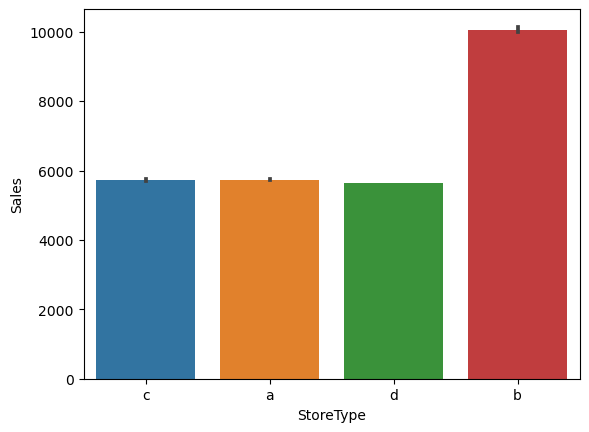

In [62]:
sns.barplot(data=train_merged_df, x='StoreType', y='Sales')

<Axes: xlabel='StoreType', ylabel='Customers'>

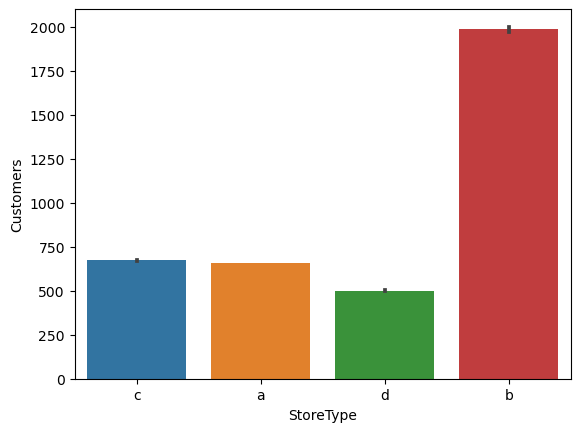

In [66]:
sns.barplot(data=train_merged_df, x='StoreType', y='Customers')

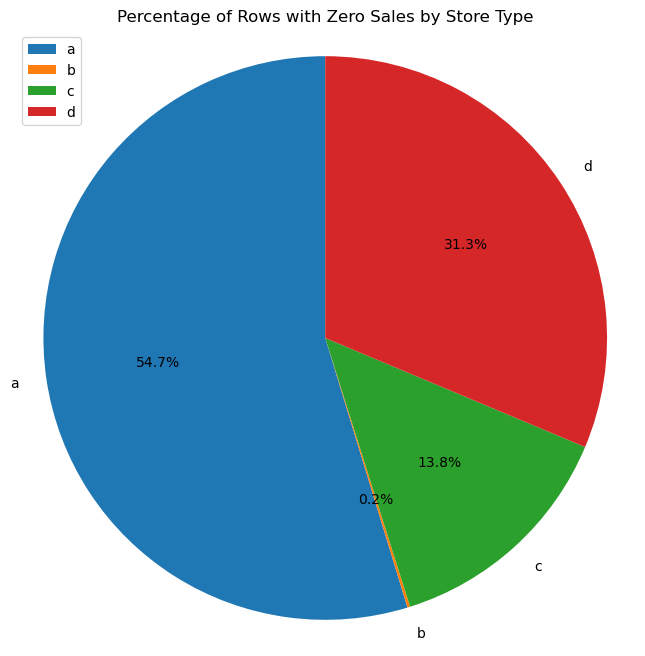

In [38]:
# Create the pie chart for store type contribution for total sales
plt.figure(figsize=(8, 8))
zero_sales_by_store.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Rows with Zero Sales by Store Type')
plt.axis('equal')  
plt.legend(zero_sales_by_store.index, loc='upper left')
plt.savefig('zero_sales_by_store_type.png')
plt.show()

In [39]:
# Calculate the total number of customers
total_number_of_customers = train_merged_df['Customers'].sum()

# Print the result
print(f"The total number of customers is: {total_number_of_customers}")

# Count the number of rows with zero in the 'Sales' column, grouped by 'StoreType'
Customers_by_store = train_merged_df[train_merged_df['Customers'] == 0].groupby('StoreType').size()

# Print the result
print(Customers_by_store)

The total number of customers is: 644041755
StoreType
a    94584
b      269
c    23872
d    54144
dtype: int64


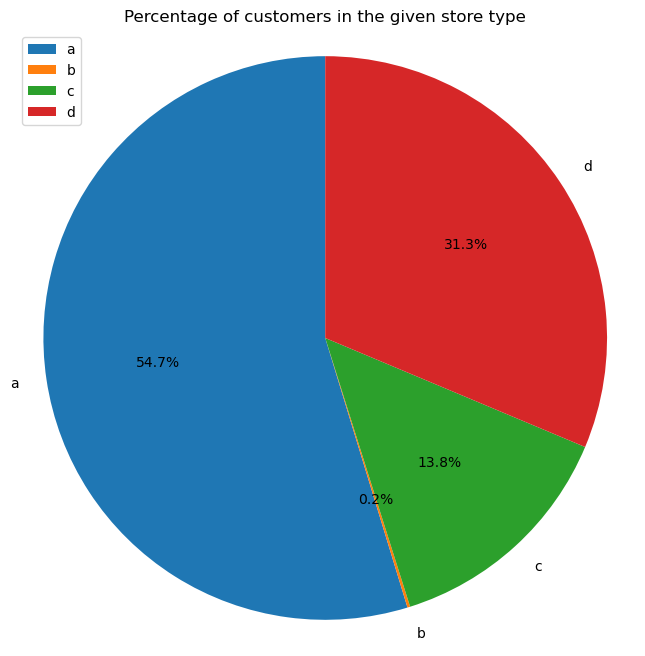

In [40]:
# Create the pie chart for customers in the given store type
plt.figure(figsize=(8, 8))
zero_sales_by_store.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of customers in the given store type')
plt.axis('equal')  
plt.legend(zero_sales_by_store.index, loc='upper left')
plt.savefig('customers by store type.png')
plt.show()

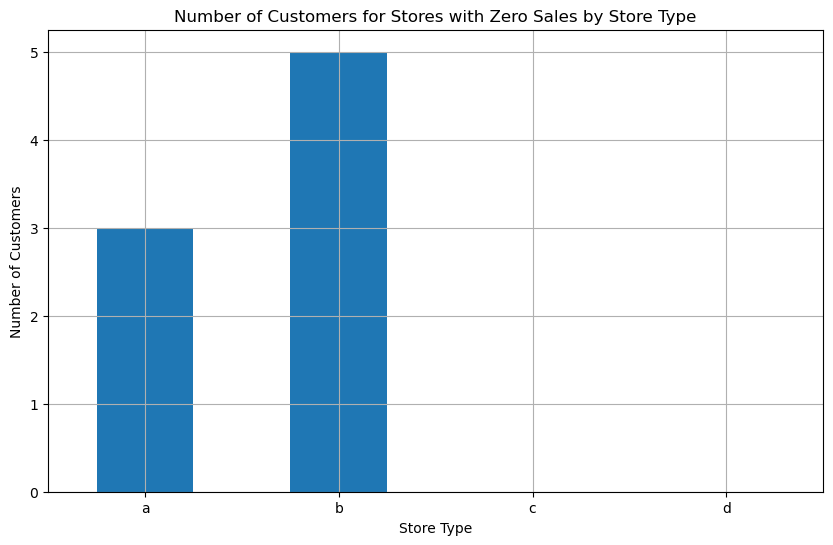

In [41]:
# Count the number of rows with zero in the 'Sales' column, grouped by 'StoreType'
zero_sales_by_store = train_merged_df[train_merged_df['Sales'] == 0].groupby('StoreType')['Customers'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
zero_sales_by_store.plot(kind='bar', rot=0)
plt.title('Number of Customers for Stores with Zero Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.savefig('zero_sales_by_store_type_customers.png')
plt.show()

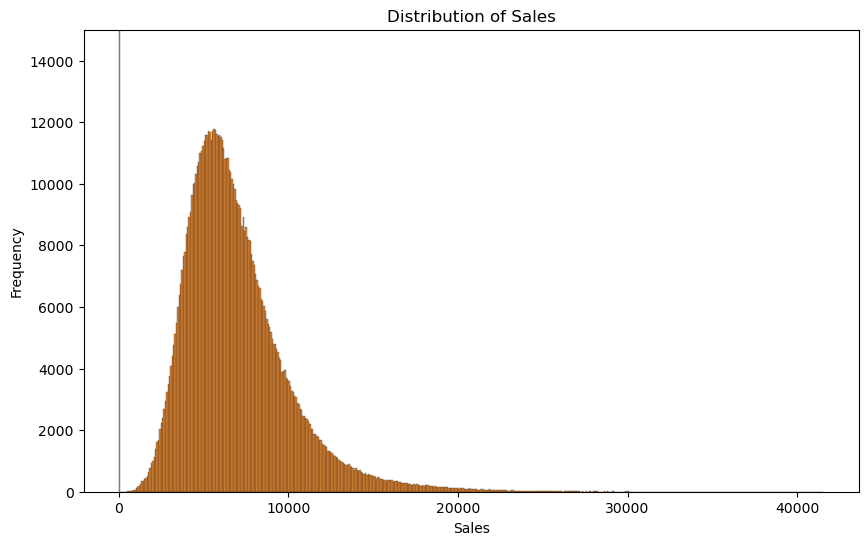

In [53]:
# Distribution of target column named 'sales'
plt.figure(figsize=(10, 6))
sns.histplot(data=train_merged_df, x='Sales')

# Create the histogram plot and store the Axes object
ax = plt.gca()
sns.histplot(data=train_merged_df, x='Sales', ax=ax)

# Decrease the y-axis range
ax.set_ylim(bottom=0, top=15000)

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

# Show the plot
plt.show()

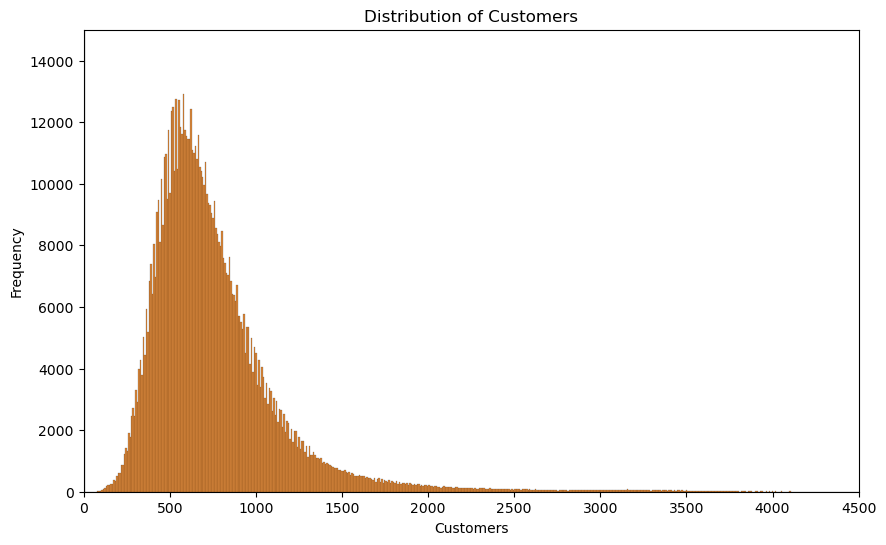

In [72]:
# Distribution of target column named 'Customers'
plt.figure(figsize=(10, 6))
sns.histplot(data=train_merged_df, x='Customers')

# Create the histogram plot and store the Axes object
ax = plt.gca()
sns.histplot(data=train_merged_df, x='Customers', ax=ax)

# Decrease the y-axis range
ax.set_ylim(bottom=0, top=15000)
ax.set_xlim(left=0, right=4500)

# Add labels and title
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customers')

# Show the plot
plt.show()

<Axes: xlabel='Assortment', ylabel='Count'>

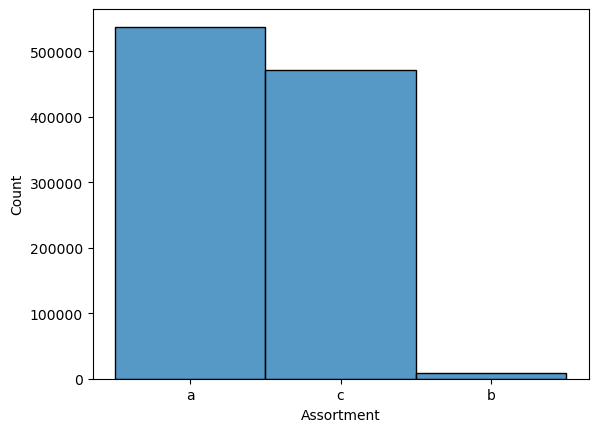

In [45]:
# Distribution of target column named 'Assortment'
sns.histplot(data=train_merged_df, x='Assortment')

Text(0.5, 1.0, 'Sales vs Customers')

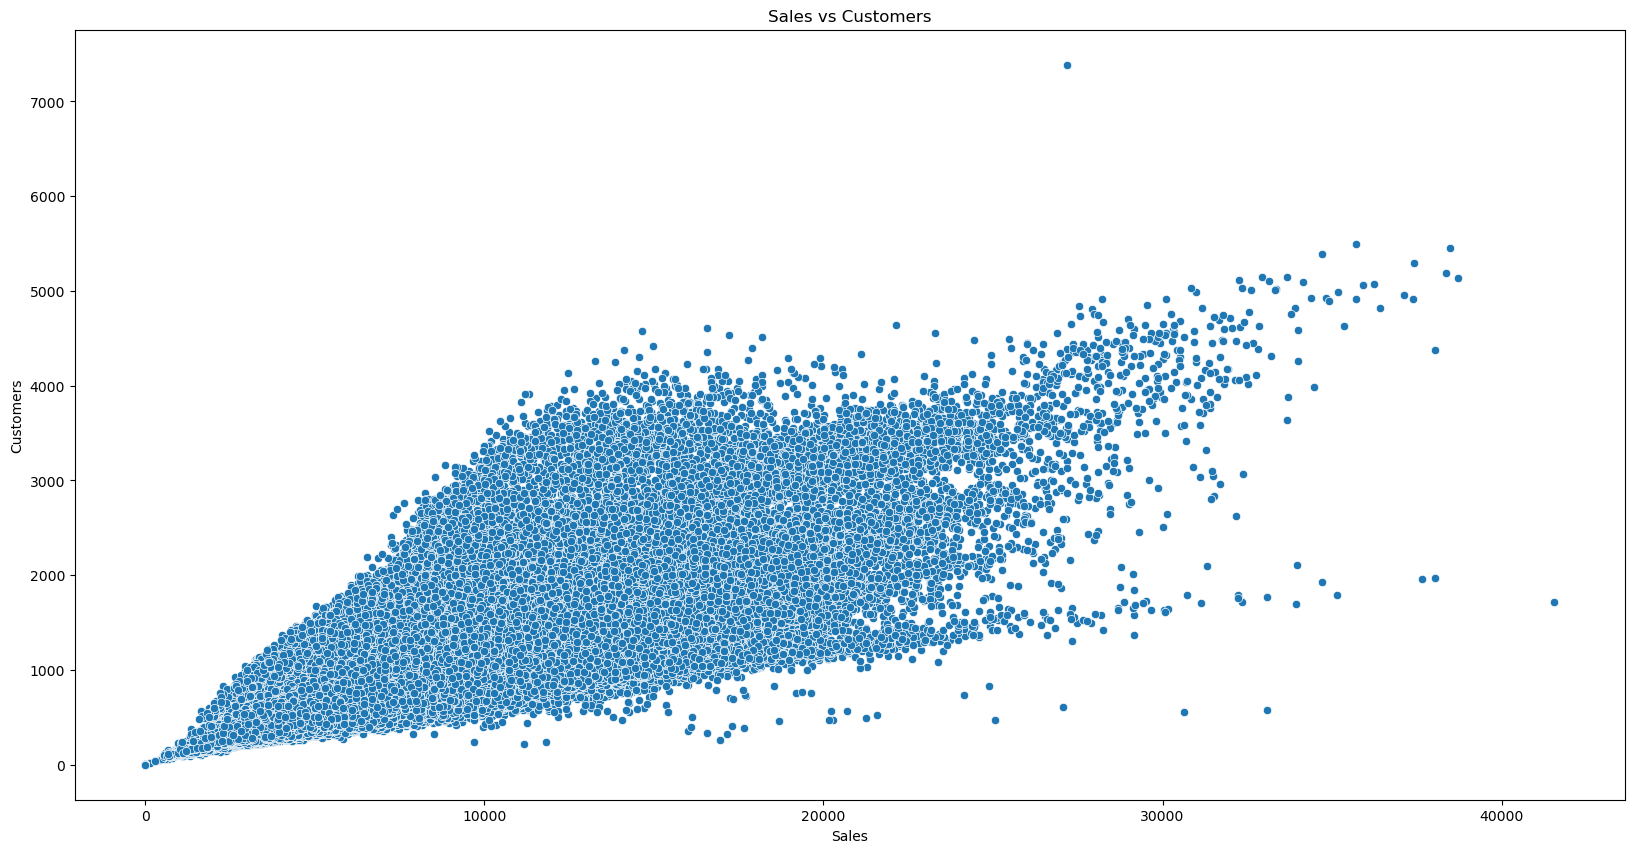

In [54]:
plt.figure(figsize=(20, 10))
# Sales vs Customers Scatter Plot
sns.scatterplot(x=train_merged_df.Sales, y=train_merged_df.Customers)
plt.title("Sales vs Customers")

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

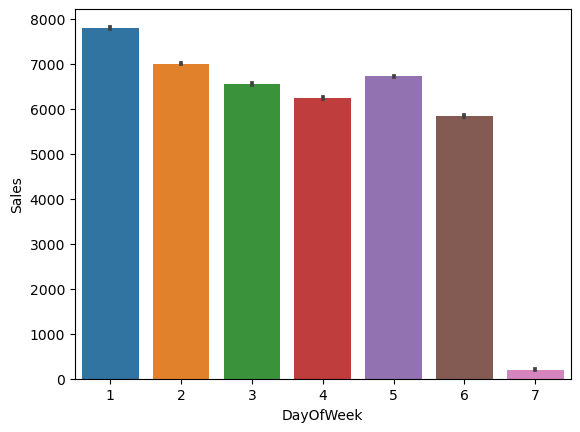

In [57]:
sns.barplot(x=train_merged_df.DayOfWeek, y=train_merged_df.Sales)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

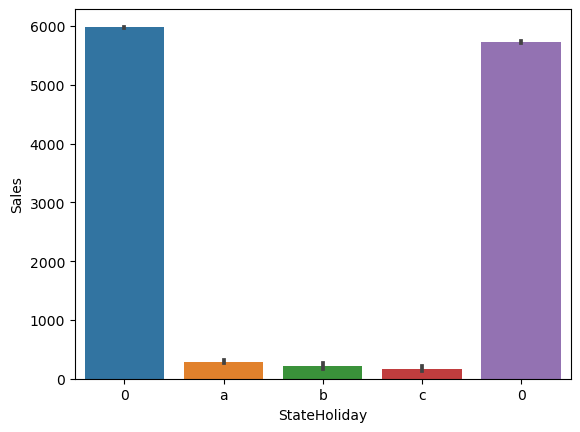

In [59]:
sns.barplot(data=train_merged_df, x='StateHoliday', y='Sales')

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

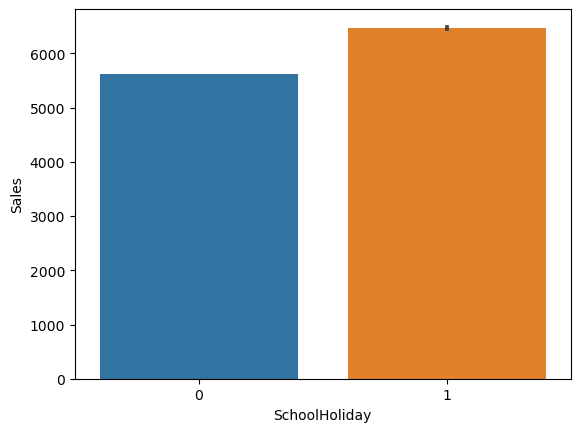

In [60]:
sns.barplot(data=train_merged_df, x='SchoolHoliday', y='Sales')

<Axes: xlabel='Assortment', ylabel='Sales'>

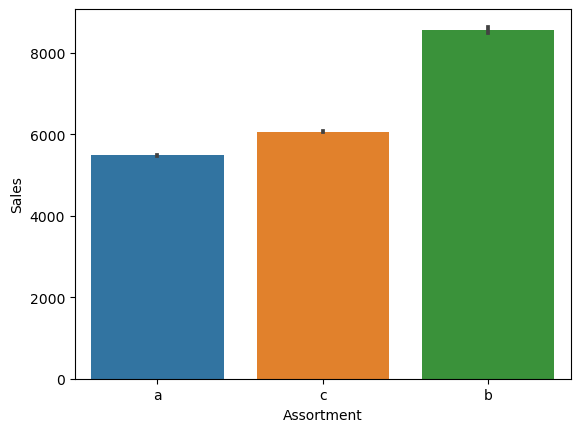

In [61]:
sns.barplot(data=train_merged_df, x='Assortment', y='Sales')

2024-05-28 02:36:33,001 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 02:36:33,001 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


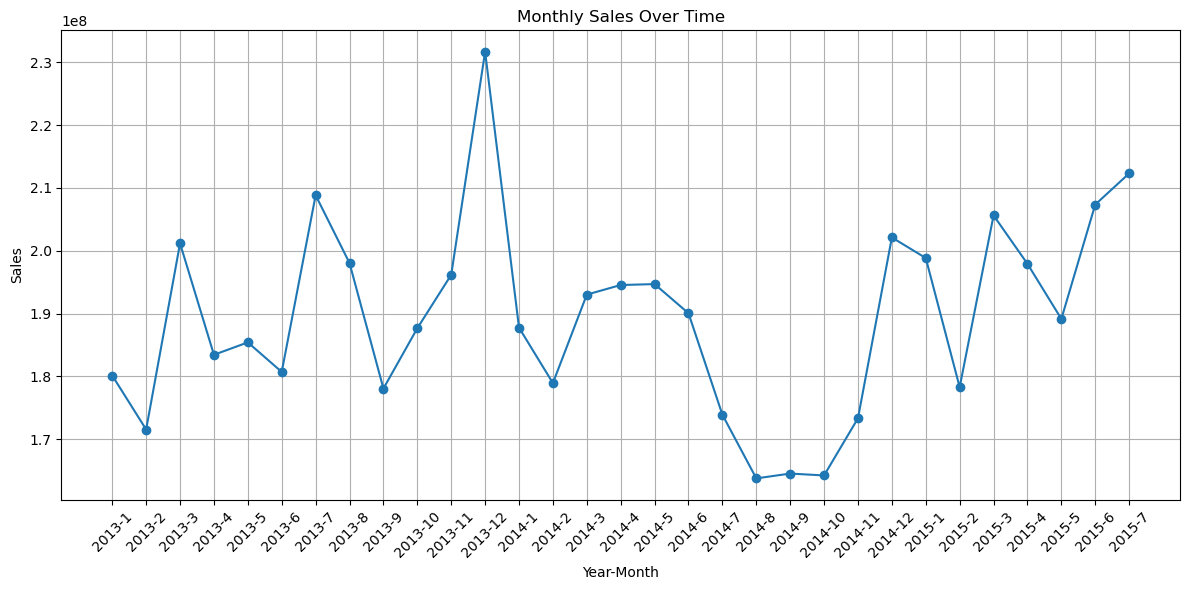

In [63]:
# Visualizing sales for each month over time

# Convert 'Date' column to datetime format
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])

# Extracting year and month from the 'Date' column
train_merged_df['Year'] = train_merged_df['Date'].dt.year
train_merged_df['Month'] = train_merged_df['Date'].dt.month
train_merged_df['Day'] = train_merged_df['Date'].dt.day

# Grouping by year and month, and summing up the sales for each group
monthly_sales = train_merged_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

2024-05-28 02:40:13,872 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 02:40:13,888 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 02:40:13,888 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 02:40:13,904 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 02:40:13,919 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates

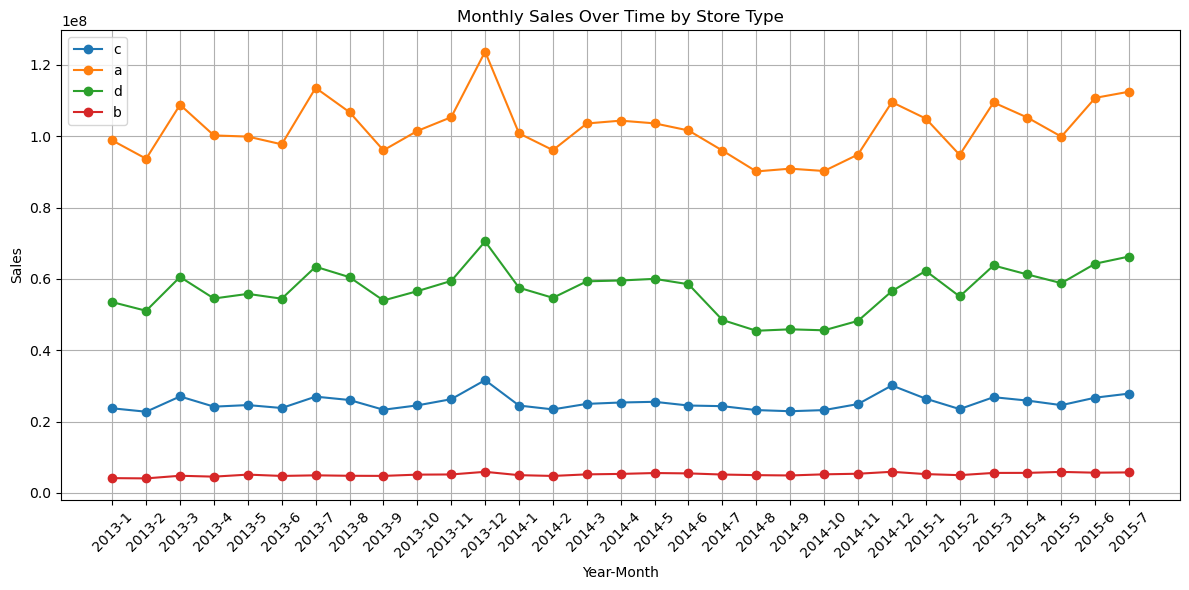

In [65]:
# Grouping by year, month, and store type, and summing up the sales for each group
monthly_sales = train_merged_df.groupby(['Year', 'Month', 'StoreType'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend for each store type
plt.figure(figsize=(12, 6))
for store_type in train_merged_df['StoreType'].unique():
    store_type_sales = monthly_sales[monthly_sales['StoreType'] == store_type]
    plt.plot(store_type_sales['Year'].astype(str) + '-' + store_type_sales['Month'].astype(str), store_type_sales['Sales'], marker='o', label=store_type)

plt.title('Monthly Sales Over Time by Store Type')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Merge store df and test df for better prediction

test_merged_df = raw_test_df.merge(raw_store_df, how='left', on='Store')
test_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [28]:
test_merged_df.shape

(41088, 17)

In [73]:
test_merged_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [ ]:
## distribution of sales variable
plt.figure(1,figsize=(15,10)) 
plt.subplot(221)
plt.hist(train.Sales,bins=30)
plt.title("Distribution of Sales") 
plt.subplot(222)
plt.hist(np.log(train.Sales+1),bins=30)
plt.title("Distribution of log(Sales)") 